# Import needed libraries

In [69]:
# base libraries
import numpy as np
import pandas as pd

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# data and preprocessing libraries
from sklearn.model_selection import train_test_split, GridSearchCV #Train-Test split
from sklearn import preprocessing

# model training libraries
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

# Error evaluation libraries
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

import warnings; warnings.simplefilter('ignore')

In [50]:
save_dir = "Images/"

 # 1. Data Loading and Preprocessing

## 1.1. Read in the Dataset

In [51]:
# Read in the dataset
adults_income = pd.read_csv("./adult.csv")

# Print the dimensions of the dataset
print('Dimension: ', adults_income.shape) 
#After ames_housing_data. type tab to see all the available variables 

# Display the head of the dataset
adults_income.head()

Dimension:  (48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## 1.2. Checking for Missing Data

In [52]:
# Checking for missing data
missing_data = adults_income.isnull().sum()

# Filtering out only those columns which have missing data
missing_data = missing_data[missing_data > 0]

missing_data

Series([], dtype: int64)

## 1.3. Removing Rows with Missing Values
Although our dataset doesn't have any missing data, we have this code for the code to be generalizable.

In [53]:
# Removing rows with missing values
adults_income_cleaned = adults_income.dropna()

# Checking the shape of the cleaned dataset to confirm the rows were removed
adults_income_cleaned.shape

(48842, 15)

## 1.4. Check for Duplicate Rows

In [54]:
# Check for duplicate rows

print('Number of duplicate rows: ', adults_income_cleaned.duplicated().sum())

Number of duplicate rows:  52


## 1.5. Remove Duplicate Rows

In [55]:
adults_income_cleaned = adults_income_cleaned.drop_duplicates(keep='first')

adults_income_cleaned.shape

(48790, 15)

# 2. Data Visualization
Many of the data are non-numeric; however, studying their correlations matters since we have to ensure we don't have one or a predictor that can explain the income 100% of the time! Thus, we must convert every non-numerical variable into a numerical one to study their correlations.

In [56]:
adults_income_cleaned.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

## 2.1. Convert All Columns to Numeric

In [57]:
#Import label encoder
from sklearn.preprocessing import LabelEncoder

#label_encoder object 
le = LabelEncoder()

#Fit label encoder and return encoded labels
#df['A'] = df['A'].astype('category')
#df['A'] = df['A'].cat.codes

adults_income_cleaned['workclass'] = adults_income_cleaned['workclass'].astype('category')
adults_income_cleaned['workclass'] = adults_income_cleaned['workclass'].cat.codes

adults_income_cleaned['education'] = adults_income_cleaned['education'].astype('category')
adults_income_cleaned['education'] = adults_income_cleaned['education'].cat.codes

adults_income_cleaned['marital-status'] = adults_income_cleaned['marital-status'].astype('category')
adults_income_cleaned['marital-status'] = adults_income_cleaned['marital-status'].cat.codes

adults_income_cleaned['occupation'] = adults_income_cleaned['occupation'].astype('category')
adults_income_cleaned['occupation'] = adults_income_cleaned['occupation'].cat.codes

adults_income_cleaned['relationship'] = adults_income_cleaned['relationship'].astype('category')
adults_income_cleaned['relationship'] = adults_income_cleaned['relationship'].cat.codes

adults_income_cleaned['race'] = adults_income_cleaned['race'].astype('category')
adults_income_cleaned['race'] = adults_income_cleaned['race'].cat.codes

adults_income_cleaned['gender'] = adults_income_cleaned['gender'].astype('category')
adults_income_cleaned['gender'] = adults_income_cleaned['gender'].cat.codes

adults_income_cleaned['native-country'] = adults_income_cleaned['native-country'].astype('category')
adults_income_cleaned['native-country'] = adults_income_cleaned['native-country'].cat.codes

adults_income_cleaned['income'] = adults_income_cleaned['income'].astype('category')
adults_income_cleaned['income'] = adults_income_cleaned['income'].cat.codes

<function matplotlib.pyplot.show(close=None, block=None)>

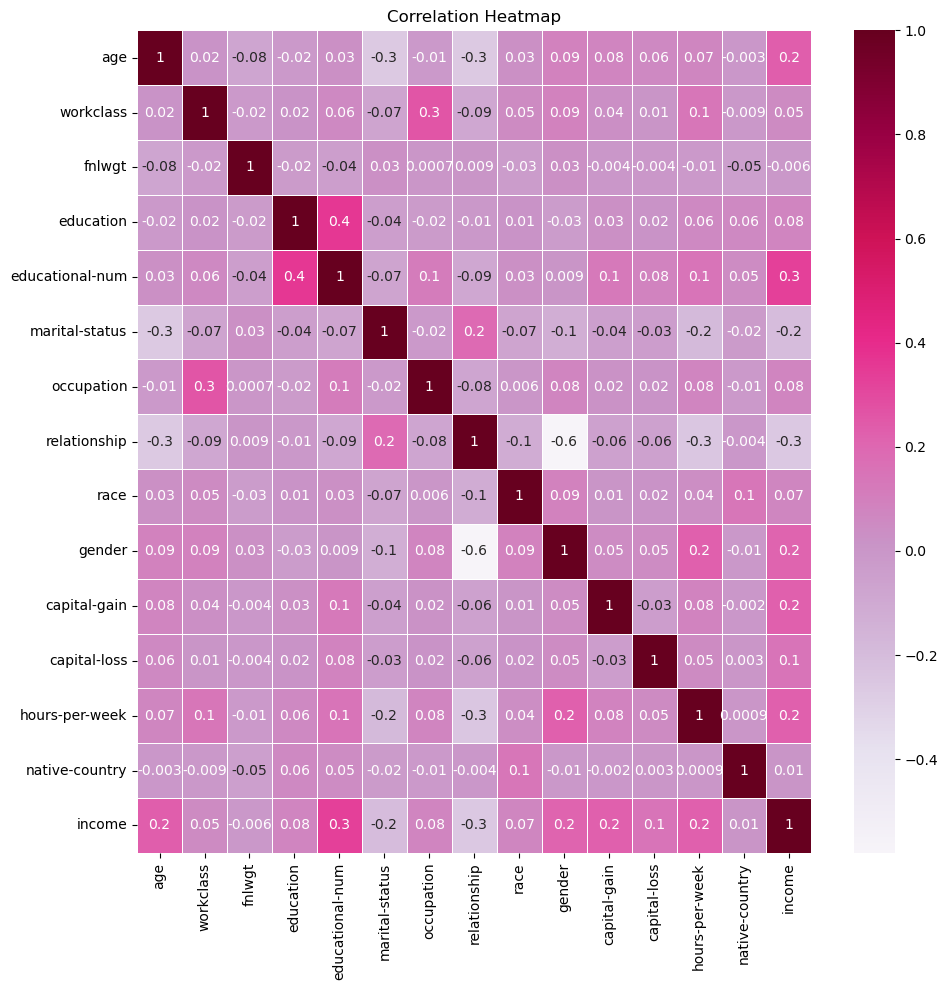

In [88]:
# Setting up the figure
plt.figure(figsize=(10, 10))

# Check correlation matrix
correlation_matrix = adults_income_cleaned.corr()

#Draw the heat map
sns.heatmap(correlation_matrix, cmap='PuRd', fmt='.1g', linewidths=0.5, annot = True)

plt.title('Correlation Heatmap')

plt.tight_layout()

filename = 'Correlation Heatmap for Adult Dataset'

plt.savefig(save_dir + filename, dpi = 300)

plt.show

# 3. Data Modelling

## 3.1. Splitting the Data Set

Data Split: Train: 80\%, 39074 data points, Test: 20\%, 9768 data points

In [59]:
X = adults_income_cleaned.drop(columns=['income'])
y = adults_income_cleaned.income
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2024)

In [60]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (39032, 14)
Shape of X_test:  (9758, 14)
Shape of y_train:  (39032,)
Shape of y_test:  (9758,)


## 3.2. Scaling the data

In [61]:
scaler = preprocessing.MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

## 3.3. Implementing the Decision Tree Classifier

In [66]:
DT = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=2024)
DT_param = {'max_depth': np.arange(1, 15)}
DT_GS = GridSearchCV(DT, DT_param, cv=5)
DT_GS.fit(X_train_scaled, y_train)
DT_GS.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=2024)

## 3.4. Visualizing the Tree

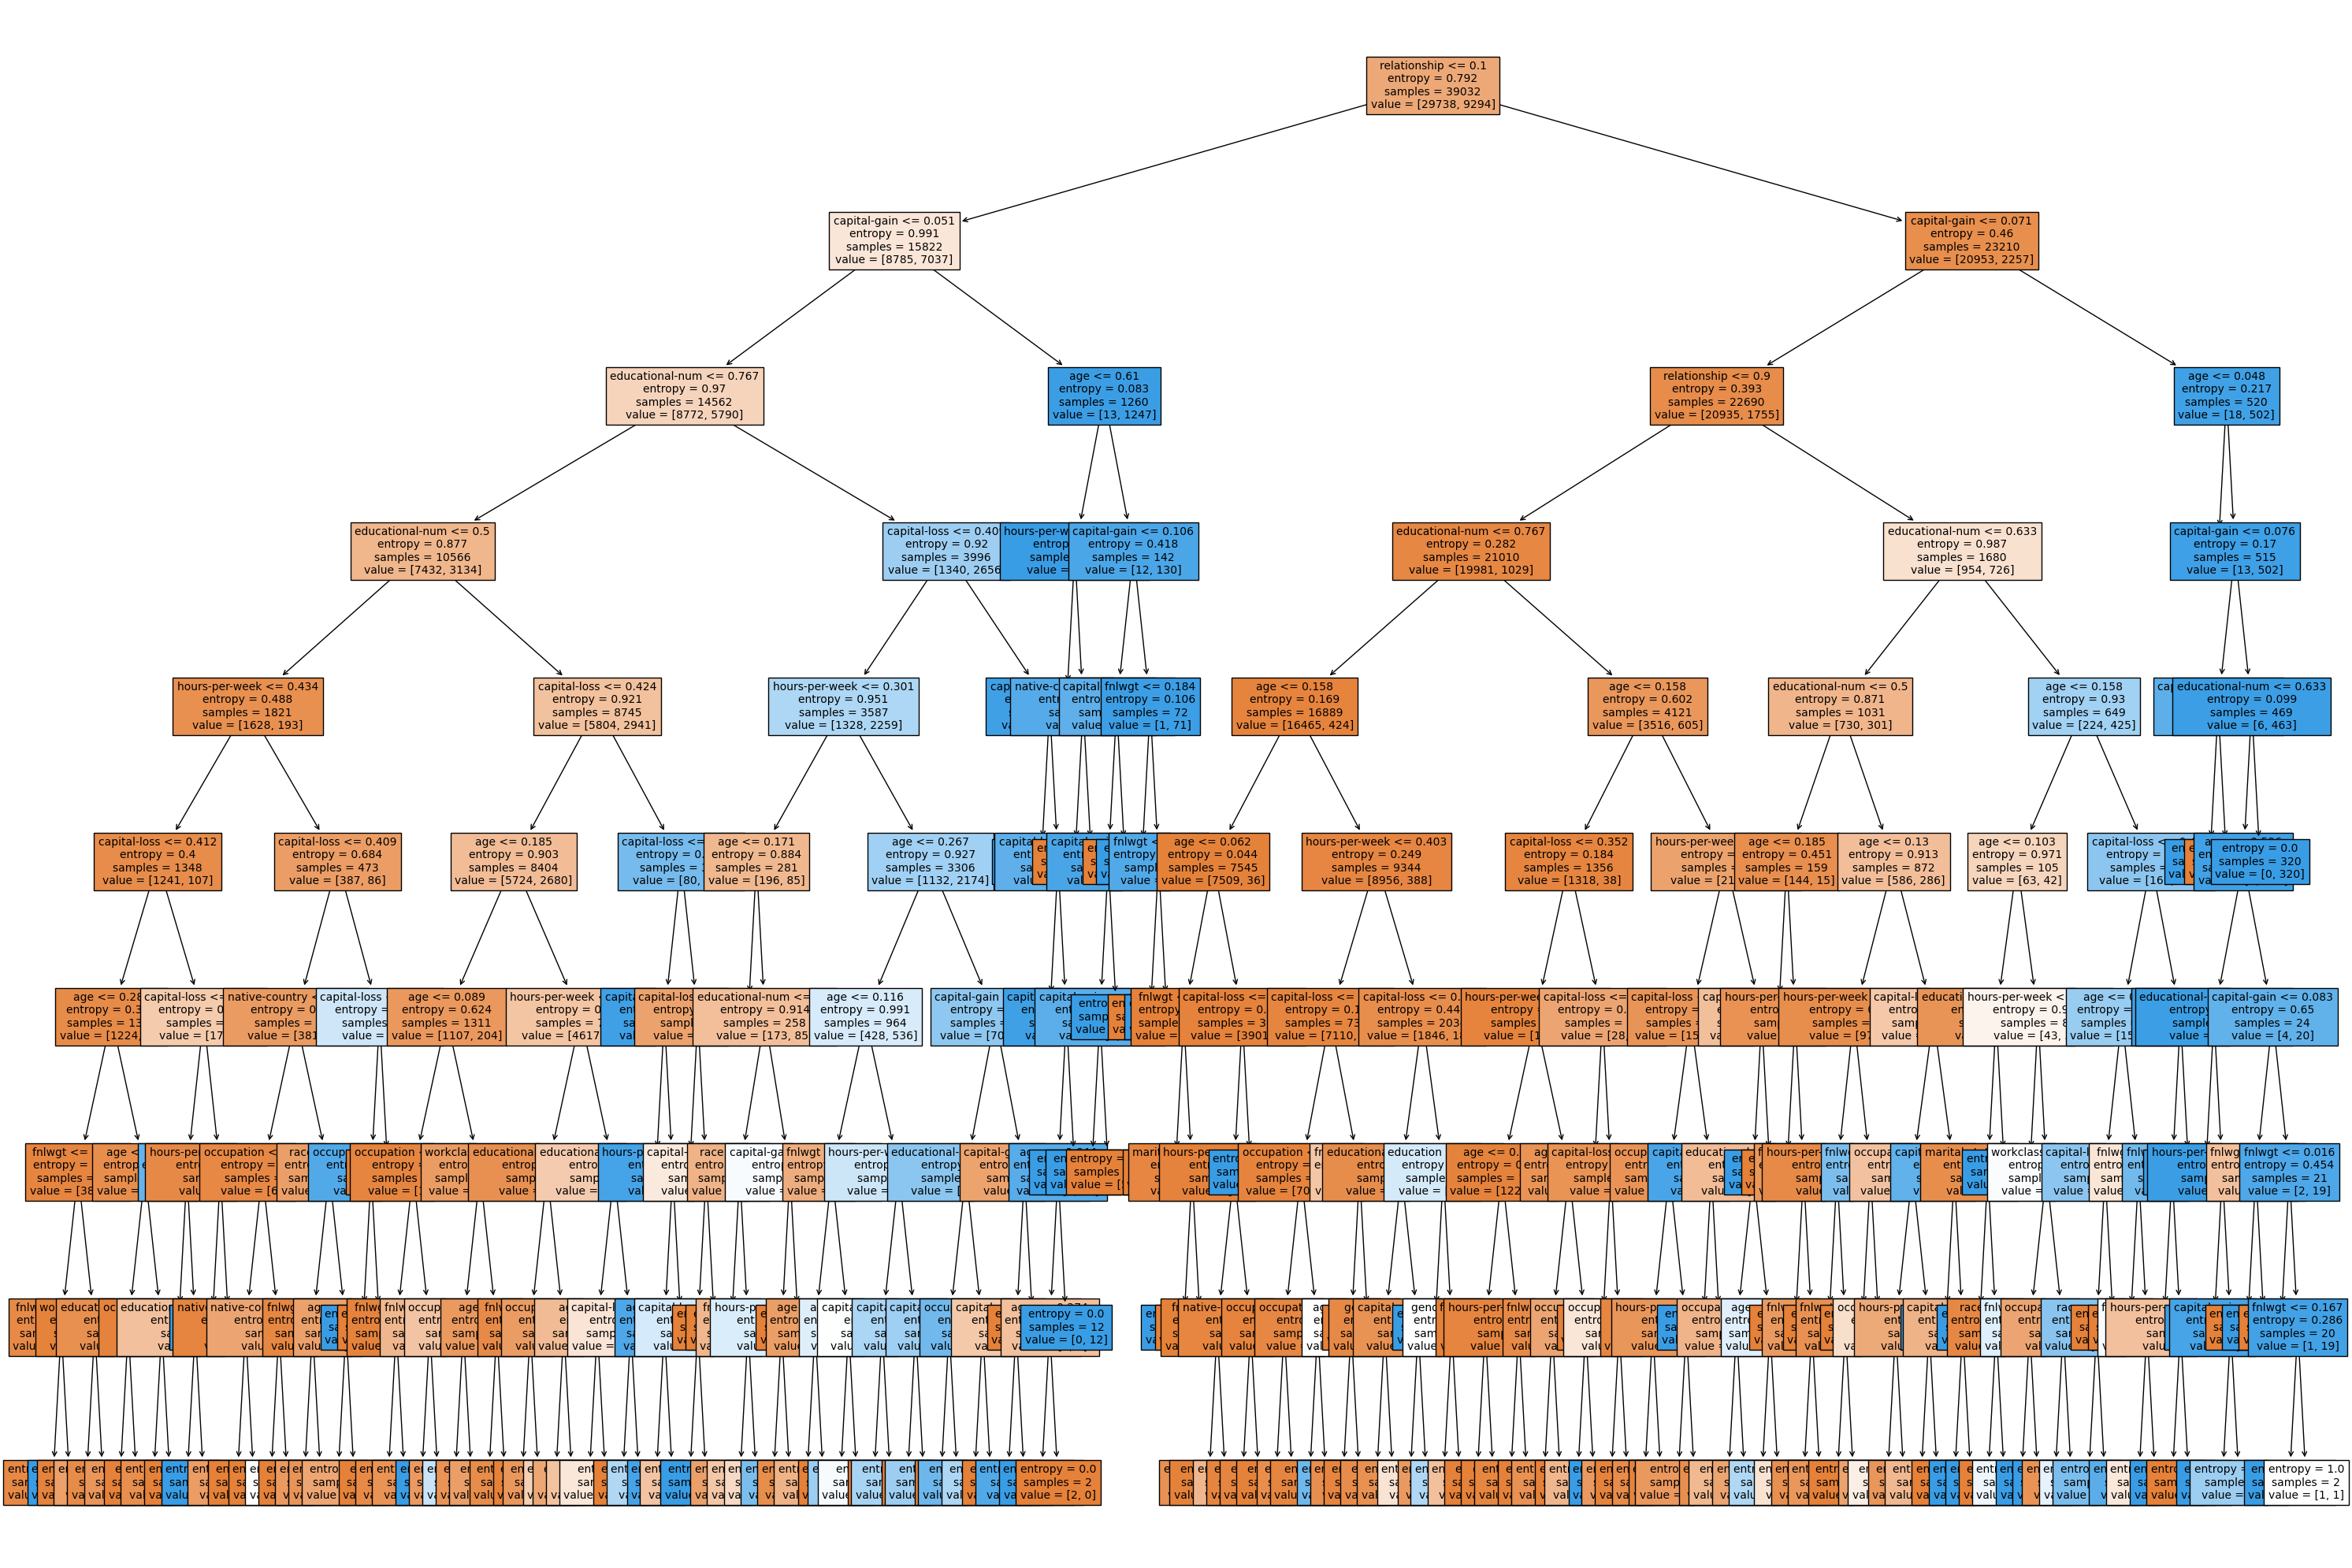

In [83]:
plt.figure(figsize=(30,20))

plot_tree(DT_GS.best_estimator_, filled=True, feature_names=X_train.columns, fontsize=10)

plt.tight_layout()

filename = 'Decision Tree Adult Dataset'

plt.savefig(save_dir + filename, dpi = 300)

plt.show()

## 3.5. Prediction and Model Evaluation

In [39]:
DT_preds = DT_GS.predict(X_test_scaled)
print("Test accuracy:", accuracy_score(DT_preds, y_test))
print("Training accuracy:", accuracy_score(DT_GS.predict(X_train_scaled), y_train))

Test accuracy: 0.8453576552572248
Training accuracy: 0.8589618774339004


## 3.6. The effect of max-depth
We can see the effect of max_depth on overfitting

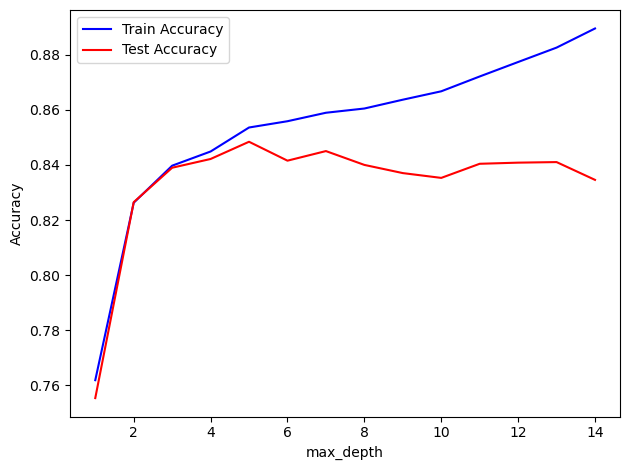

In [82]:
maxdepth = np.arange(1,15)
train_results = []
test_results = []

for m in maxdepth:
    model = DecisionTreeClassifier(max_depth=m, random_state=2023)
    model.fit(X_train_scaled, y_train)
    train_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(train_pred, y_train)
    train_results.append(train_accuracy)
    test_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(test_pred, y_test)
    test_results.append(test_accuracy)

plt.plot(maxdepth, train_results, 'b', label='Train Accuracy')
plt.plot(maxdepth, test_results, 'r', label='Test Accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('max_depth')

plt.tight_layout()

filename = 'The Effect of Max_depth on Overfitting'

plt.savefig(save_dir + filename, dpi = 300)

plt.show()

## 3.7. Confusion matrix

In [41]:
print(confusion_matrix(DT_preds, y_test))

[[7022 1160]
 [ 349 1227]]


## 3.8. Classification report

In [42]:
print(classification_report(DT_preds, y_test))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      8182
           1       0.51      0.78      0.62      1576

    accuracy                           0.85      9758
   macro avg       0.73      0.82      0.76      9758
weighted avg       0.88      0.85      0.86      9758



In [1]:
'''
import os

def datasetFilenames(datasetName):
   prefix = os.path.join(os.path.dirname(__file__), datasetName)
   return prefix + '.train', prefix + '.test'

def datasetFilenameAll(datasetName):
   prefix = os.path.join(os.path.dirname(__file__), datasetName)
   return prefix + '.data'

def vectorize(value, values):
   return [int(v==value) for v in values]
'''

"\nimport os\n\ndef datasetFilenames(datasetName):\n   prefix = os.path.join(os.path.dirname(__file__), datasetName)\n   return prefix + '.train', prefix + '.test'\n\ndef datasetFilenameAll(datasetName):\n   prefix = os.path.join(os.path.dirname(__file__), datasetName)\n   return prefix + '.data'\n\ndef vectorize(value, values):\n   return [int(v==value) for v in values]\n"

In [2]:
'''
from .datautils import *

name = "adult"
protectedIndex = 1 # gender
protectedValue = 0 # female

employers = ('Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov',
             'Local-gov', 'State-gov', 'Without-pay', 'Never-worked')
maritals = ('Married-civ-spouse', 'Divorced', 'Never-married', 'Separated',
            'Widowed', 'Married-spouse-absent', 'Married-AF-spouse')
occupations = ('Tech-support', 'Craft-repair', 'Other-service', 'Sales',
               'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct',
               'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv',
               'Protective-serv', 'Armed-Forces')
races = ('White', 'Asian-Pac-Islander','Amer-Indian-Eskimo', 'Other', 'Black')
sexes = ('Female', 'Male')
countries = ('United-States', 'Cambodia', 'England', 'Puerto-Rico',
            'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece',
            'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland',
            'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France',
            'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia',
            'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia',
            'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands')


featureNames = (('age','sex') + employers + ('education',) + maritals + occupations +
               races + ('capital_gain','capital_loss','hr_per_week') + countries)


def processLine(line):
   values = line.strip().split(', ')
   (age, employer, _, _, education, marital, occupation, _, race, sex,
      capital_gain, capital_loss, hr_per_week, country, income) = values

   # put sex second so I know what index it is
   point = ([int(age), 0 if sex=='Female' else 1] + vectorize(employer, employers) + [int(education)] +
             vectorize(marital, maritals) + vectorize(occupation, occupations) + vectorize(race, races) +
            [int(capital_gain), int(capital_loss), int(hr_per_week)] + vectorize(country, countries))
   label = 1 if income[0] == '>' else -1

   return tuple(point), label


def column(A,j):
   return [row[j] for row in A]

def transpose(A):
   return [column(A,j) for j in range(len(A[0]))]

def normalizeExamples(data):
   points, labels = zip(*data)
   points = transpose([normalize(row) for row in transpose(points)])
   return list(zip(points, labels))


def load(separatePointsAndLabels=False):
   trainFilename, testFilename = datasetFilenames('adult')

   with open(trainFilename, 'r') as infile:
      trainingData = [processLine(line) for line in infile]

   with open(testFilename, 'r') as infile:
      testData = [processLine(line) for line in infile]

   if separatePointsAndLabels:
      trainPoints, trainLabels = zip(*trainingData)
      testPoints, testLabels = zip(*testData)
      return (trainPoints, trainLabels), (testPoints, testLabels)
   else:
      return trainingData, testData
'''

'\nfrom .datautils import *\n\nname = "adult"\nprotectedIndex = 1 # gender\nprotectedValue = 0 # female\n\nemployers = (\'Private\', \'Self-emp-not-inc\', \'Self-emp-inc\', \'Federal-gov\',\n             \'Local-gov\', \'State-gov\', \'Without-pay\', \'Never-worked\')\nmaritals = (\'Married-civ-spouse\', \'Divorced\', \'Never-married\', \'Separated\',\n            \'Widowed\', \'Married-spouse-absent\', \'Married-AF-spouse\')\noccupations = (\'Tech-support\', \'Craft-repair\', \'Other-service\', \'Sales\',\n               \'Exec-managerial\', \'Prof-specialty\', \'Handlers-cleaners\', \'Machine-op-inspct\',\n               \'Adm-clerical\', \'Farming-fishing\', \'Transport-moving\', \'Priv-house-serv\',\n               \'Protective-serv\', \'Armed-Forces\')\nraces = (\'White\', \'Asian-Pac-Islander\',\'Amer-Indian-Eskimo\', \'Other\', \'Black\')\nsexes = (\'Female\', \'Male\')\ncountries = (\'United-States\', \'Cambodia\', \'England\', \'Puerto-Rico\',\n            \'Canada\', \'German

In [3]:
'''
# labelBias: [[float]], [int], int, obj -> float
# compute the signed bias of a set of labels on a given dataset
def labelBias(data, labels, protectedIndex, protectedValue):
   protectedClass = [(x,l) for (x,l) in zip(data, labels)
      if x[protectedIndex] == protectedValue]
   elseClass = [(x,l) for (x,l) in zip(data, labels)
      if x[protectedIndex] != protectedValue]

   if len(protectedClass) == 0:
      raise Exception("Nobody in the protected class")
   elif len(elseClass) == 0:
      raise Exception("Nobody in the unprotected class")
   else:
      protectedProb = sum(1 for (x,l) in protectedClass if l == 1) / len(protectedClass)
      elseProb = sum(1 for (x,l) in elseClass  if l == 1) / len(elseClass)

   return elseProb - protectedProb


# signedBias: [[float]], int, obj, h -> float
# compute the signed bias of a hypothesis on a given dataset
def signedBias(data, h, protectedIndex, protectedValue):
   return labelBias(data, [h(x) for x in data], protectedIndex, protectedValue)



if __name__ == "__main__":
   from data import adult
   train, test = adult.load(separatePointsAndLabels=True)

   tests = [('female', (1,0)),
            ('private employment', (2,1)),
            ('asian race', (33,1)),
            ('divorced', (12, 1))]

   for (name, (index, value)) in tests:
      print("anti-'%s' bias in training data: %.4f" %
         (name, labelBias(train[0], train[1], index, value)))


   indian = lambda x: x[47] == 1
   print(len([x for x in train[0] if indian(x)]) / len(train[0]))
   print(signedBias(train[0], indian, 1, 0))
'''

'\n# labelBias: [[float]], [int], int, obj -> float\n# compute the signed bias of a set of labels on a given dataset\ndef labelBias(data, labels, protectedIndex, protectedValue):\n   protectedClass = [(x,l) for (x,l) in zip(data, labels)\n      if x[protectedIndex] == protectedValue]\n   elseClass = [(x,l) for (x,l) in zip(data, labels)\n      if x[protectedIndex] != protectedValue]\n\n   if len(protectedClass) == 0:\n      raise Exception("Nobody in the protected class")\n   elif len(elseClass) == 0:\n      raise Exception("Nobody in the unprotected class")\n   else:\n      protectedProb = sum(1 for (x,l) in protectedClass if l == 1) / len(protectedClass)\n      elseProb = sum(1 for (x,l) in elseClass  if l == 1) / len(elseClass)\n\n   return elseProb - protectedProb\n\n\n# signedBias: [[float]], int, obj, h -> float\n# compute the signed bias of a hypothesis on a given dataset\ndef signedBias(data, h, protectedIndex, protectedValue):\n   return labelBias(data, [h(x) for x in data], p